# この notebook を読み進める前に
TeX 出力のためには次のコードを読み込ませること.

In [4]:
from sympy import *
from IPython.display import display
init_printing(use_unicode=True)

 # シンボル定義
a, b, x, y, z, t = symbols('a b x y z t')
x0 = symbols('x_0')
M, N = symbols('M N')
f, g, h = symbols('f g h', cls=Function)

Sympy で行列を釣るには `Matrix` オブジェクトを使う.
行列は行ベクトルのリストから作られる.
次の行列を作るコードは下記の通り.
\begin{align}
 \left[\begin{array}{cc}1 & -1\\3 & 4\\0 & 2\end{array}\right].
\end{align}

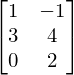

In [3]:
M = Matrix([[1, -1], [3, 4], [0, 2]])
display(M)

列ベクトルを作りやすくするには要素のリストを列ベクトルと思えばいい.

In [4]:
display(Matrix([1, 2, 3]))

行列は Sympy や Python の他のオブジェクトと同じように扱える.

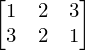

In [5]:
M = Matrix([[1, 2, 3], [3, 2, 1]])
N = Matrix([0, 1, 1])
display(M)
display(N)
display(M*N)

# 注意
Sympy の行列は他の全ての Sympy のオブジェクトと違って可変なことに注意する.
不変な `Matrix` オブジェクトがほしい場合は `ImmutableMatrix` を使うこと.

# 基本的な操作
## 行列の型取得
行列に対する基本的な操作がある.
行列の型を知りたければ `shape` を使う.

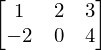

In [6]:
M = Matrix([[1, 2, 3], [-2, 0, 4]])
display(M)
display(M.shape)

## 行や列へのアクセス
行列に対して個別の行や列を得たいときは `row` や `col` を使う.
例えば `M.row(0)` は最初の行を取る.
`M.col(-1)` は最後の列を取る.

In [7]:
M = Matrix([[1, 2, 3], [-2, 0, 4]])
display(M.row(0))
display(M.col(-1))

## 行や列の追加・削除
行や列を削除するには `row_del()` や `col_del()` を使う.
これらはその行列自体を変更する.

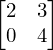

In [8]:
M = Matrix([[1, 2, 3], [-2, 0, 4]])
M.col_del(0)
display(M)
M.row_del(1)
display(M)

行や列を追加するには `row_insert()` や `col_insert()` を使う.
これはその行列自体を変更**しない**.

In [12]:
M = Matrix([[2, 3]])
display(M)

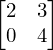

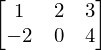

In [13]:
N = M.row_insert(1, Matrix([[0, 4]]))
display(M)
display(N)
N = N.col_insert(0, Matrix([1, -2]))
display(N)

# 以下注意
明示的に書かない限り以下のメソッドは自身に作用しない.
一般に自身に作用しないメソッドは新たな行列を返し自身に作用するメソッドは `None` を返す.

## 基本的なメソッド
既に説明したように和や積のような基本的な演算には `+`, `*`, `**` を使えばいい.
逆行列を見つけるには `M ** -1` のようにすればいい.
転置は `T` メソッドで.

In [ ]:
M = Matrix([[1, 3], [-2, 3]])
N = Matrix([[0, 3], [0, 7]])
display(M)
display(N)
print('----')
display(M + N)
print('----')
display(M*N)
print('----')
display(3*M)
print('----')
display(M**2)
print('----')
display(M**-1)
print('----')
display(N**-1)

### 転置

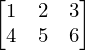

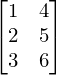

In [2]:
M = Matrix([[1, 2, 3], [4, 5, 6]])
display(M)
display(M.T)

## 発展的な方法
### 行列式 `det()`
行列式の計算には `det()` を使う.

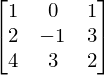

In [5]:
M = Matrix([[1, 0, 1], [2, -1, 3], [4, 3, 2]])
display(M)
display(M.det())

### RREF, 階段系 (echelon form)
行列を簡約された行階段系に変換するには `rref()` を使う.
`rref()` は 2 つ要素のタプルを返す.
第 1 要素は簡約された行階段系で,
第 2 要素はピボット列のインデックスのリスト.

#### 注意
第 1 要素は行列型で,
第 2 要素はリスト型.

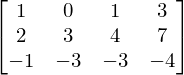

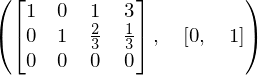

In [7]:
M = Matrix([[1, 0, 1, 3], [2, 3, 4, 7], [-1, -3, -3, -4]])
display(M)
display(M.rref())

### `Nullspace()`
行列の核 (kernel) は `nullspace()` でわかる.
`nullspace()` は核の基底となる列ベクトルのリストを返す.

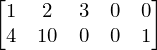

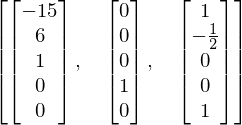

In [10]:
M = Matrix([[1, 2, 3, 0, 0], [4, 10, 0, 0, 1]])
display(M)
display(M.nullspace())

### `columnspace()`
行列の columnspace を見つけるには `columnspace()` を使う.
columnspace がまだ何なのかよくわかっていない.
`columnspace()` は行列の columnspace を張る列ベクトルのリストを返す.

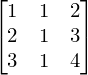

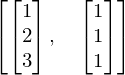

In [11]:
M = Matrix([[1, 1, 2], [2 ,1 , 3], [3 , 1, 4]])
display(M)
display(M.columnspace())

### 固有値, 固有ベクトル, 対角化
固有値は `eigenvals()`: これは「固有値: 代数的多重度」の辞書を返す.
下の結果は $M$ が固有値 -2, 3, 5 を持つこと,
-2 と 3 の代数的多重度は 1, 5 は代数的多重度 2 であることを意味している.

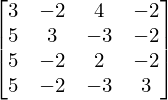

In [13]:
M = Matrix([[3, -2,  4, -2], [5,  3, -3, -2], [5, -2,  2, -2], [5, -2, -3,  3]])
display(M)
display(M.eigenvals())

固有ベクトルは `eigenvects()` を使う.
これは「固有値: 代数的多重度, [固有ベクトル]」形式のタプルのリストを返す.

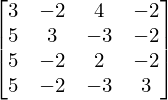

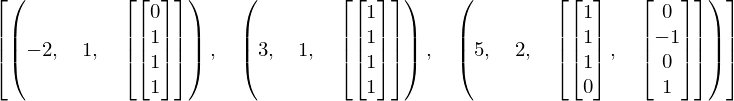

In [15]:
M = Matrix([[3, -2,  4, -2], [5,  3, -3, -2], [5, -2,  2, -2], [5, -2, -3,  3]])
display(M)
display(M.eigenvects())

行列を対角化したいなら `diagonalize()` を使う.
`diagonalize()` は $(P, D)$ のタプルを返す.
ここで $D$ は対角行列で $P$ は $M = P D P^{-1}$ となる $P$.

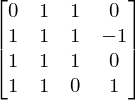

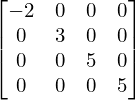

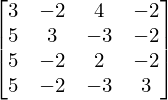

True

In [16]:
P, D= M.diagonalize()
display(P)
display(D)
display(P*D*P**-1)
display(P*D*P**-1 == M)

### Tips
固有値に $\lambda$ を使いたくても Python の予約語なのでそのままでは使えない.
そういう場合は `lamda` を使うといい.
これも pretty print で $\lambda$ になる.

### 注意
`eigenvects()` は固有値も含むので固有ベクトルもほしい場合は `eigenvals()` よりも `eigenvects()` を使う方がいい.
もちろん, 固有ベクトルの計算は一般にコストが高いので固有値だけがほしいなら `eigenvals()` を使う方がいい.

特性多項式がほしいだけなら `charpoly()` がある.
シンボリックな根の計算コストは高くなることがあるから `eigenvals()` よりも効率がいい.

In [18]:
lamda = symbols('lamda')
p = M.charpoly(lamda)
display(p)
display(factor(p))